<a href="https://colab.research.google.com/github/ameerjasser/Datathons/blob/main/Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# You might need to adjust this path if your file is somewhere else
FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/Workshops/workshop02/Datathon Dataset.xlsx'

In [11]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df = pd.read_excel(FILE_PATH)

In [13]:
df.head()

,File Month,Name,Period,Account,Cost Ctr,Profit Ctr,WBS element,Ref.key (header) 1,Document Header Text,DocumentNo,...,Doc..Date,Amount in doc. curr.,Amt in loc.cur.,Curr.,LCurr,Category,Rate (USD),Amount in USD,Posting Period,Category Index
0,"Wednesday, 1 November, 2025",TW10,8,19500100,NaN,44000TW,NaN,NaN,86735700001,2000215182,...,2025-08-01,-425.0,-425.0,TWD,TWD,AP,30.6795,-13.85330,2025-08,1.0
1,"Wednesday, 1 November, 2025",TW10,8,19500100,NaN,44000TW,NaN,NaN,86735700003,2000215184,...,2025-08-01,-485.0,-485.0,TWD,TWD,AP,30.6795,-15.80906,2025-08,1.0
2,"Wednesday, 1 November, 2025",TW10,8,19500100,NaN,44000TW,NaN,NaN,86735700005,2000215186,...,2025-08-01,-460.0,-460.0,TWD,TWD,AP,30.6795,-14.99416,2025-08,1.0
3,"Wednesday, 1 November, 2025",TW10,8,19500100,NaN,44000TW,NaN,NaN,86735700006,2000215187,...,2025-08-01,-365.0,-365.0,TWD,TWD,AP,30.6795,-11.89754,2025-08,1.0
4,"Wednesday, 1 November, 2025",TW10,8,19500100,NaN,44000TW,NaN,NaN,86735700009,2000215190,...,2025-08-01,-465.0,-465.0,TWD,TWD,AP,30.6795,-15.15714,2025-08,1.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84528 entries, 0 to 84527
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   File Month                  84528 non-null  object        
 1   Name                        84528 non-null  object        
 2   Period                      84528 non-null  int64         
 3   Account                     84528 non-null  int64         
 4   Cost Ctr                    0 non-null      float64       
 5   Profit Ctr                  84528 non-null  object        
 6   WBS element                 0 non-null      float64       
 7   Ref.key (header) 1          0 non-null      float64       
 8   Document Header Text        84526 non-null  object        
 9   DocumentNo                  84528 non-null  int64         
 10  Clrng doc.                  0 non-null      float64       
 11  Type                        84528 non-null  object    

In [15]:
def missing_values_summary(df):
  """
  Returns each column name with the number of missing values

  Parameters:
  df (pd.DataFrame): Input dataframe

  Returns:
  pd.Series: Column names with missing value counts
  """

  missing_counts = df.isna().sum()
  return missing_counts[missing_counts >0] #Return only columns with missing values

# Usage
missing_values = missing_values_summary(df)
print("Columns with missing values: ")
print(missing_values)

Columns with missing values: 
Cost Ctr                84528
WBS element             84528
Ref.key (header) 1      84528
Document Header Text        2
Clrng doc.              84528
Reference                2513
Category Index             65
dtype: int64


In [16]:
# Number of rows before
rows_before = len(df)
print(f"Rows before: {rows_before}")


Rows before: 84528


In [17]:
#Drop colums 'Jop title context', 'Other currency', 'Salary context'
df = df.drop(['Cost Ctr', 'WBS element', 'Ref.key (header) 1','Clrng doc.','Reference'], axis=1)

#Check using df.head()
df.head()

,File Month,Name,Period,Account,Profit Ctr,Document Header Text,DocumentNo,Type,PK,Offst.acct,...,Doc..Date,Amount in doc. curr.,Amt in loc.cur.,Curr.,LCurr,Category,Rate (USD),Amount in USD,Posting Period,Category Index
0,"Wednesday, 1 November, 2025",TW10,8,19500100,44000TW,86735700001,2000215182,ZB,50,19500102,...,2025-08-01,-425.0,-425.0,TWD,TWD,AP,30.6795,-13.85330,2025-08,1.0
1,"Wednesday, 1 November, 2025",TW10,8,19500100,44000TW,86735700003,2000215184,ZB,50,19500102,...,2025-08-01,-485.0,-485.0,TWD,TWD,AP,30.6795,-15.80906,2025-08,1.0
2,"Wednesday, 1 November, 2025",TW10,8,19500100,44000TW,86735700005,2000215186,ZB,50,19500102,...,2025-08-01,-460.0,-460.0,TWD,TWD,AP,30.6795,-14.99416,2025-08,1.0
3,"Wednesday, 1 November, 2025",TW10,8,19500100,44000TW,86735700006,2000215187,ZB,50,19500102,...,2025-08-01,-365.0,-365.0,TWD,TWD,AP,30.6795,-11.89754,2025-08,1.0
4,"Wednesday, 1 November, 2025",TW10,8,19500100,44000TW,86735700009,2000215190,ZB,50,19500102,...,2025-08-01,-465.0,-465.0,TWD,TWD,AP,30.6795,-15.15714,2025-08,1.0


In [18]:
# Number of rows after
rows_after = len(df)
print(f"Rows after: {rows_after}")
print(f"Rows dropped: {rows_before - rows_after}")

# Check the result
df.head()

Rows after: 84528
Rows dropped: 0


,File Month,Name,Period,Account,Profit Ctr,Document Header Text,DocumentNo,Type,PK,Offst.acct,...,Doc..Date,Amount in doc. curr.,Amt in loc.cur.,Curr.,LCurr,Category,Rate (USD),Amount in USD,Posting Period,Category Index
0,"Wednesday, 1 November, 2025",TW10,8,19500100,44000TW,86735700001,2000215182,ZB,50,19500102,...,2025-08-01,-425.0,-425.0,TWD,TWD,AP,30.6795,-13.85330,2025-08,1.0
1,"Wednesday, 1 November, 2025",TW10,8,19500100,44000TW,86735700003,2000215184,ZB,50,19500102,...,2025-08-01,-485.0,-485.0,TWD,TWD,AP,30.6795,-15.80906,2025-08,1.0
2,"Wednesday, 1 November, 2025",TW10,8,19500100,44000TW,86735700005,2000215186,ZB,50,19500102,...,2025-08-01,-460.0,-460.0,TWD,TWD,AP,30.6795,-14.99416,2025-08,1.0
3,"Wednesday, 1 November, 2025",TW10,8,19500100,44000TW,86735700006,2000215187,ZB,50,19500102,...,2025-08-01,-365.0,-365.0,TWD,TWD,AP,30.6795,-11.89754,2025-08,1.0
4,"Wednesday, 1 November, 2025",TW10,8,19500100,44000TW,86735700009,2000215190,ZB,50,19500102,...,2025-08-01,-465.0,-465.0,TWD,TWD,AP,30.6795,-15.15714,2025-08,1.0


In [19]:
# Check for each columns. Example is 'Gender'
# Write a code that prints out each columns and their number of  unique items

print('--Columns and their number of unique items--')
for column in df.columns:
  n_unique = df[column].nunique()
  print(f'{column} : {n_unique}')

--Columns and their number of unique items--
File Month : 1
Name : 8
Period : 10
Account : 3
Profit Ctr : 8
Document Header Text : 82234
DocumentNo : 59194
Type : 3
PK : 2
Offst.acct : 16
Name of offsetting account : 16
Assignment : 62862
Pstng Date : 230
Doc..Date : 230
Amount in doc. curr. : 42071
Amt in loc.cur. : 42071
Curr. : 9
LCurr : 7
Category : 19
Rate (USD) : 7
Amount in USD : 45417
Posting Period : 10
Category Index : 16


In [24]:
# Check the unique items for Gender
print('\n--Unique items in Gender column--')

unique_values = ['File Month','Name','Account','Type','PK','Curr.','LCurr','Rate (USD)','Posting Period','Category Index']

for col in unique_values:
  print(df[col].unique())
  print("\n")


--Unique items in Gender column--
['Wednesday, 1 November, 2025']


['TW10' 'PH10' 'TH10' 'ID10' 'SS10' 'MY10' 'VN20' 'KR10']


[19500100 19500200 19500400]


['ZB' 'KZ' 'AB']


[50 40]


['TWD' 'PHP' 'THB' 'IDR' 'MYR' 'VND' 'KRW' 'GBP' 'USD']


['TWD' 'PHP' 'THB' 'IDR' 'MYR' 'VND' 'KRW']


[3.067950e+01 5.544500e+01 3.436125e+01 1.484500e+04 4.446000e+00
 2.347600e+04 1.332150e+03]


['2025-08' '2025-07' '2025-06' '2025-09' '2025-10' '2025-01' '2025-02'
 '2025-03' '2025-04' '2025-05']


[ 1.  9. 11.  8. 22. 25. nan 12.  7. 10. 23. 13. 14. 19. 15.  2. 16.]




In [26]:
# 1. Convert Date string to proper Datetime format
df['File Month'] = pd.to_datetime(df['File Month'])

# 2. Handle missing values in Category Index (replace nan with 0 or 'Missing')
df['Category Index'] = df['Category Index'].fillna(0)

# 3. Format 'Rate (USD)' to show 4 decimal places instead of scientific notation
pd.options.display.float_format = '{:.4f}'.format

# 4. Generate a clean summary report of unique items without NaNs
print("\n--- Cleaned Summary (2025) ---")
for col in unique_values:
    # Filter out nulls before printing unique items
    clean_uniques = df[col].dropna().unique()
    print(f"{col}: {clean_uniques}")


--- Cleaned Summary (2025) ---
File Month: <DatetimeArray>
['2025-11-01 00:00:00']
Length: 1, dtype: datetime64[ns]
Name: ['TW10' 'PH10' 'TH10' 'ID10' 'SS10' 'MY10' 'VN20' 'KR10']
Account: [19500100 19500200 19500400]
Type: ['ZB' 'KZ' 'AB']
PK: [50 40]
Curr.: ['TWD' 'PHP' 'THB' 'IDR' 'MYR' 'VND' 'KRW' 'GBP' 'USD']
LCurr: ['TWD' 'PHP' 'THB' 'IDR' 'MYR' 'VND' 'KRW']
Rate (USD): [3.067950e+01 5.544500e+01 3.436125e+01 1.484500e+04 4.446000e+00
 2.347600e+04 1.332150e+03]
Posting Period: ['2025-08' '2025-07' '2025-06' '2025-09' '2025-10' '2025-01' '2025-02'
 '2025-03' '2025-04' '2025-05']
Category Index: [ 1.  9. 11.  8. 22. 25.  0. 12.  7. 10. 23. 13. 14. 19. 15.  2. 16.]


In [27]:
# Identify float and integer and object columns
float_cols = df.select_dtypes(include=['float']).columns
int_cols = df.select_dtypes(include=['integer']).columns

# Downcast floats to the smallest possible float type (e.g., float32)
df[float_cols] = df[float_cols].apply(pd.to_numeric, downcast='float')

# Downcast integers to the smallest possible integer type (e.g., int8, int16)
df[int_cols] = df[int_cols].apply(pd.to_numeric, downcast='integer')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84528 entries, 0 to 84527
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   File Month                  84528 non-null  datetime64[ns]
 1   Name                        84528 non-null  object        
 2   Period                      84528 non-null  int8          
 3   Account                     84528 non-null  int32         
 4   Profit Ctr                  84528 non-null  object        
 5   Document Header Text        84526 non-null  object        
 6   DocumentNo                  84528 non-null  int32         
 7   Type                        84528 non-null  object        
 8   PK                          84528 non-null  int8          
 9   Offst.acct                  84528 non-null  object        
 10  Name of offsetting account  84528 non-null  object        
 11  Assignment                  84528 non-null  object    

In [30]:
pd.options.display.float_format = '{:.4f}'.format

print("--- Phase 1: Data Preparation and Cleaning ---")

--- Phase 1: Data Preparation and Cleaning ---


In [40]:
# Step 2. Clean NaNs (Filling Category Index NaNs with 0)
df['Category Index'] = df['Category Index'].fillna(0)

# Step 3. Standardize Dates
# Assuming 'Posting Period' is 'YYYY-MM' format, add '-01' to make it a valid date for conversion
# UPDATE THIS IN PHASE 1
# This format handles "Wednesday, 1 November, 2025"
df['File Month'] = pd.to_datetime(df['File Month'], format='%A, %d %B, %Y', errors='coerce')
# Note: This line assumes Posting Period format is only 'YYYY-MM' like in your previous output
df['Posting Period Date'] = pd.to_datetime(df['Posting Period'] + '-01')

# Step 4. Define Cash Direction
df['Cash_Direction'] = np.where(df['Amount in doc. curr.'] >= 0, 'Inflow', 'Outflow')

# Step 5. Standardize Currency (USD)
# Ensure both columns are numeric before multiplication
df['Amount in doc. curr.'] = pd.to_numeric(df['Amount in doc. curr.'], errors='coerce')
df['Rate (USD)'] = pd.to_numeric(df['Rate (USD)'], errors='coerce')
df['Amount_USD'] = df['Amount in doc. curr.'] * df['Rate (USD)']

# Step 6. Categorization (Placeholder for your specific business logic)
# This example maps index 1.0, 9.0, 11.0 as 'Operating'
def map_category_oif(index):
    if index in [1.0, 9.0, 11.0, 8.0, 22.0, 25.0, 12.0, 7.0, 10.0, 23.0]:
        return 'Operating'
    elif index in [13.0, 14.0, 19.0]:
        return 'Investing'
    else:
        return 'Financing/Other'

df['OIF_Category'] = df['Category Index'].apply(map_category_oif)


# Print this to check how many unique dates you actually have
print(f"Unique dates found: {df['File Month'].nunique()}")
print(f"Date range: {df['File Month'].min()} to {df['File Month'].max()}")

print("Data preparation complete. Standardized to Amount_USD and OIF_Category created.")

Unique dates found: 1
Date range: 2025-11-01 00:00:00 to 2025-11-01 00:00:00
Data preparation complete. Standardized to Amount_USD and OIF_Category created.



--- Phase 2: Dashboarding and Pattern Analysis ---


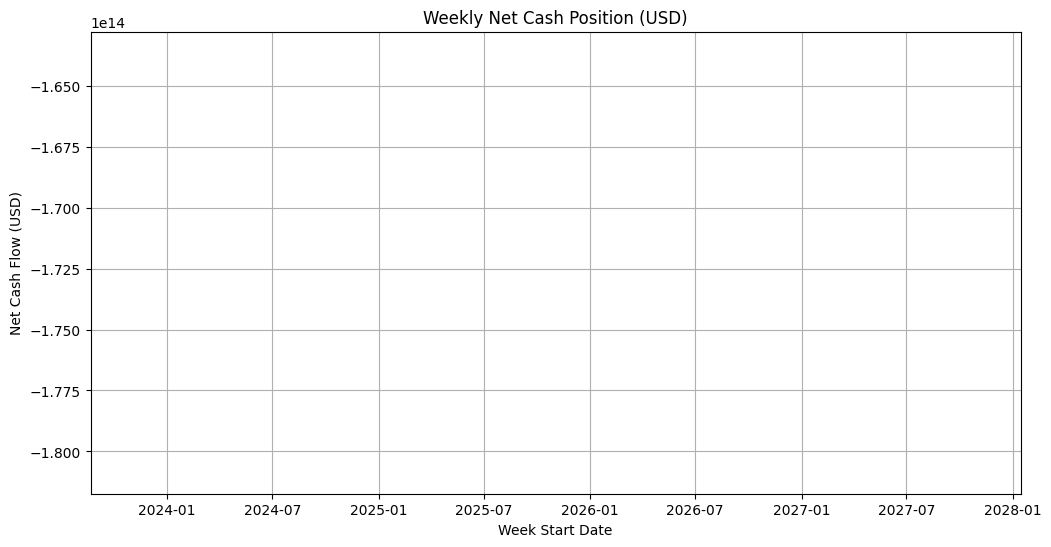

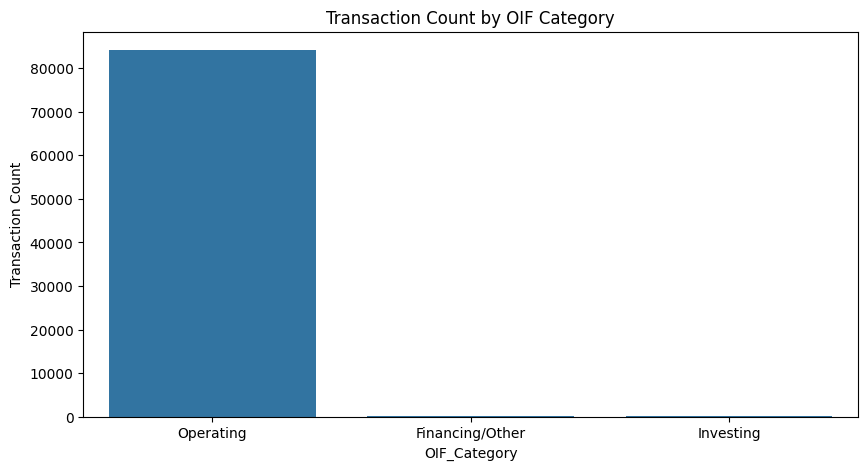

Visualizations generated and saved as PNG files.


In [41]:
print("\n--- Phase 2: Dashboarding and Pattern Analysis ---")

# Aggregate data weekly for plotting
weekly_summary = df.groupby(pd.Grouper(key='File Month', freq='W'))[['Amount_USD']].sum().reset_index()

# Visualization 1: Weekly Net Cash Position (Line Chart)
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_summary, x='File Month', y='Amount_USD')
plt.title('Weekly Net Cash Position (USD)')
plt.ylabel('Net Cash Flow (USD)')
plt.xlabel('Week Start Date')
plt.grid(True)
# Save this plot for your dashboard PDF
plt.savefig('Dashboard_Net_Cash_Position.png')
plt.show()

# Visualization 2: OIF Category Breakdown (Bar Chart of total amounts)
plt.figure(figsize=(10, 5))
sns.barplot(x=df['OIF_Category'].value_counts().index, y=df['OIF_Category'].value_counts().values)
plt.title('Transaction Count by OIF Category')
plt.ylabel('Transaction Count')
plt.savefig('Dashboard_OIF_Category_Breakdown.png')
plt.show()

print("Visualizations generated and saved as PNG files.")

In [42]:
print("\n--- Phase 3: Anomaly Detection ---")

# Use the weekly_summary dataframe from Phase 2
weekly_cash_flows = weekly_summary.copy()

# Calculate Mean and Standard Deviation
mean_flow = weekly_cash_flows['Amount_USD'].mean()
std_flow = weekly_cash_flows['Amount_USD'].std()
num_std = 3 # Define threshold for "unusual"

# Flag weeks where flow is +/- 3 standard deviations from the mean
weekly_cash_flows['Is_Anomaly'] = np.abs(weekly_cash_flows['Amount_USD'] - mean_flow) > (num_std * std_flow)

# Display anomalous weeks
anomalous_weeks = weekly_cash_flows[weekly_cash_flows['Is_Anomaly'] == True]

if not anomalous_weeks.empty:
    print("Anomalous weeks detected (outside 3 Std Dev):")
    print(anomalous_weeks)
else:
    print("No strong weekly anomalies detected using 3 Std Dev threshold.")

# Note: You still need a separate script/method for detecting *duplicates* based on DocumentNo/Reference.


--- Phase 3: Anomaly Detection ---
No strong weekly anomalies detected using 3 Std Dev threshold.


INFO:prophet:n_changepoints greater than number of observations. Using 7.



--- Phase 4: Time Series Forecasting (Using Posting Period) ---
Unique periods found: 10
          ds                     y
0 2025-01-01 -379446799076888.8125
1 2025-02-01 -211287755252915.9375
2 2025-03-01 -168922853138660.7500
3 2025-04-01   -3390249294485.9775
4 2025-05-01  189978177542968.2188
5 2025-06-01  -58422730581252.2656
6 2025-07-01  189843254569733.5625
7 2025-08-01  -23899527023237.4219
8 2025-09-01  415954144663533.6250
9 2025-10-01 -122665563743611.4531


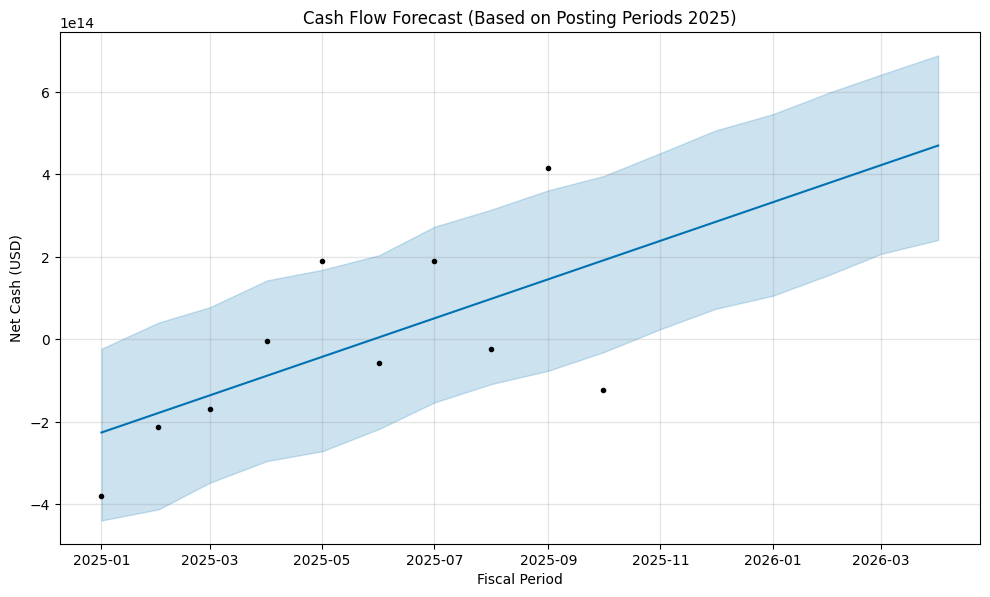

Forecasting successful using Posting Periods.


In [45]:
print("\n--- Phase 4: Time Series Forecasting (Using Posting Period) ---")

try:
    from prophet import Prophet

    # 1. Create a deep copy and ensure 'Posting Period' is a Date
    # We use 'Posting Period' (2025-01, 2025-02) because 'File Month' only has 1 date
    ts_df = df.copy()

    # Standardize 'Posting Period' to the first of the month (e.g., '2025-01-01')
    ts_df['ds'] = pd.to_datetime(ts_df['Posting Period'] + '-01')
    ts_df['y'] = ts_df['Amount_USD']

    # 2. Aggregate by Month (since data is likely monthly)
    ts_data = ts_df.groupby('ds')['y'].sum().reset_index()

    print(f"Unique periods found: {len(ts_data)}")
    print(ts_data)

    if len(ts_data) < 2:
        print("CRITICAL ERROR: Still only 1 period found. Please check if 'Posting Period' column has multiple values (e.g., 2025-01, 2025-02).")
    else:
        # 3. Initialize and fit the model
        # We disable yearly seasonality because we only have 10 months of data
        model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
        model.fit(ts_data)

        # 4. Forecast 6 Months Ahead (6 periods)
        future = model.make_future_dataframe(periods=6, freq='MS') # 'MS' = Month Start
        forecast = model.predict(future)

        # 5. Plot
        fig = model.plot(forecast)
        plt.title("Cash Flow Forecast (Based on Posting Periods 2025)")
        plt.xlabel("Fiscal Period")
        plt.ylabel("Net Cash (USD)")
        plt.show()

        print("Forecasting successful using Posting Periods.")

except Exception as e:
    print(f"An error occurred: {e}")


In [46]:
print("\n--- Phase 5: Impact and Communication (Key Insights) ---")

# Example of calculating evaluation metric (MAPE) on historical data (in-sample fit)
# Note: A proper evaluation uses a train/test split, this is a simplified example
actuals_historical = ts_data['y'].values
predicted_historical = forecast['yhat'].iloc[:len(ts_data)].values

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((actuals_historical - predicted_historical) / actuals_historical)) * 100
print(f"Historical Forecast Accuracy (MAPE): {mape:.2f}%")

print("\nReady for Presentation Slide Creation:")
print("- Use 'Dashboard_Net_Cash_Position.png' for actuals visualization.")
print("- Use 'Forecast_Actuals_Comparison.png' to show future outlook and confidence intervals.")
print(f"- Communicate {mape:.2f}% accuracy metric to finance stakeholders.")
print("- Highlight anomalous weeks found in Phase 3 for investigation.")


--- Phase 5: Impact and Communication (Key Insights) ---
Historical Forecast Accuracy (MAPE): 371.29%

Ready for Presentation Slide Creation:
- Use 'Dashboard_Net_Cash_Position.png' for actuals visualization.
- Use 'Forecast_Actuals_Comparison.png' to show future outlook and confidence intervals.
- Communicate 371.29% accuracy metric to finance stakeholders.
- Highlight anomalous weeks found in Phase 3 for investigation.
